In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json

def get_stock_advice(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        middle_section = soup.find('div', {'class': 'middle_section'})
        data = []
        if middle_section:
            news_list = middle_section.find('ul', {'class': 'news_list'})
            if news_list:
                articles = news_list.find_all('li')
                for article in articles:
                    stock_info = article.find('div', {'class': 'rb_gd14'})
                    stock_name_link = stock_info.find('a')
                    stock_name = stock_name_link.get_text(strip=True)
                    stock_price = stock_info.find_all('strong')[1].get_text(strip=True).replace(',', '')
                    try:
                        stock_price_float = float(stock_price)
                    except ValueError:
                        stock_price_float = 0.0
                    article_link = article.find('div', {'class': 'MT5'}).find('a')
                    recommendation = article_link.get_text(strip=True)
                    recommendation_parts = recommendation.split(':')
                    if len(recommendation_parts) > 1:
                        recommendation_trimmed = recommendation_parts[0].split(';')[0].strip()
                        source = recommendation_parts[-1].strip()
                    else:
                        recommendation_trimmed = recommendation
                        source = ''
                    match = re.search(r'target of Rs (\d+[:,]?\d+)', recommendation)
                    if match:
                        target_value = match.group(1).replace(',', '')
                        try:
                            target_value_float = float(target_value)
                        except ValueError:
                            target_value_float = 0.0
                    else:
                        target_value = ''
                        target_value_float = 0.0
                    revenue = target_value_float - stock_price_float
                    if stock_price_float != 0:
                        profit_percent = (revenue / stock_price_float) * 100
                    else:
                        profit_percent = 0.0
                    data.append({
                        'Stock Name': stock_name,
                        'Price': f'Rs {stock_price}',
                        'Recommendation': recommendation_trimmed,
                        'Target Price': target_value,
                        'Source': source,
                        'Revenue': f'Rs {revenue:.2f}',
                        'Profit Percent': f'{profit_percent:.2f}%'
                    })
            else:
                return {'error': 'No news list found on the page.'}
        else:
            return {'error': 'No middle section found on the page.'}
    else:
        return {'error': 'Failed to retrieve the webpage.'}
    return data

url = 'https://m.moneycontrol.com/markets/stock-advice/'
all_recommended_stocks = get_stock_advice(url)
print(json.dumps(all_recommended_stocks, indent=4))


[
    {
        "Stock Name": "HDFC Bank",
        "Price": "Rs 1531.55",
        "Recommendation": "Buy HDFC Bank",
        "Target Price": "1850",
        "Source": "ICICI Securities",
        "Revenue": "Rs 318.45",
        "Profit Percent": "20.79%"
    },
    {
        "Stock Name": "Tejas Networks",
        "Price": "Rs 1114.40",
        "Recommendation": "Buy Tejas Networks",
        "Target Price": "1100",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs -14.40",
        "Profit Percent": "-1.29%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6697.70",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs 2302.30",
        "Profit Percent": "34.37%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6697.70",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Fin

In [2]:
all_recommended_stocks = [
    {
      "name": "HCL Tech",
      "price": "1324.10",
      "recommendation": "Buy HCL Technologies",
      "target_price": "1880",
      "source": "Motilal Oswal",
      "revenue": 555.9000000000001,
      "profit_percent": 41.983233894720954
    },
    {
      "name": "HCL Tech",
      "price": "1324.10",
      "recommendation": "Buy HCL Technologies",
      "target_price": "1880",
      "source": "Motilal Oswal",
      "revenue": 555.9000000000001,
      "profit_percent": 41.983233894720954
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Buy HDFC Life Insurance Company",
      "target_price": "750",
      "source": "Sharekhan",
      "revenue": 200.14999999999998,
      "profit_percent": 36.400836591797756
    },
    {
      "name": "Guj State Petro",
      "price": "290.00",
      "recommendation": "Buy Gujarat State Petronet",
      "target_price": "392",
      "source": "Prabhudas Lilladher",
      "revenue": 102,
      "profit_percent": 35.172413793103445
    },
    {
      "name": "Metro Brands",
      "price": "1135.55",
      "recommendation": "Buy Metro Brands",
      "target_price": "1530",
      "source": "Motilal Oswal",
      "revenue": 394.45000000000005,
      "profit_percent": 34.73647131346044
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1870",
      "source": "YES Securities",
      "revenue": 463.0999999999999,
      "profit_percent": 32.91634089132134
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Buy HDFC Life Insurance",
      "target_price": "725",
      "source": "Emkay Global Financial",
      "revenue": 175.14999999999998,
      "profit_percent": 31.85414203873783
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Sharekhan",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Sharekhan",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Emkay Global Financial",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2010",
      "source": "Religare Retail Research",
      "revenue": 478.45000000000005,
      "profit_percent": 31.23959387548562
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2000",
      "source": "Prabhudas Lilladher",
      "revenue": 468.45000000000005,
      "profit_percent": 30.58666057262251
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2000",
      "source": "Prabhudas Lilladher",
      "revenue": 468.45000000000005,
      "profit_percent": 30.58666057262251
    },
    {
      "name": "IndusInd Bank",
      "price": "1461.85",
      "recommendation": "Buy IndusInd Bank",
      "target_price": "1900",
      "source": "Motilal Oswal",
      "revenue": 438.1500000000001,
      "profit_percent": 29.972295379142878
    },
    {
      "name": "Shyam Metalics",
      "price": "609.75",
      "recommendation": "Buy Shyam Metalics and Energy",
      "target_price": "780",
      "source": "ICICI Securities",
      "revenue": 170.25,
      "profit_percent": 27.92127921279213
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "1950",
      "source": "Motilal Oswal",
      "revenue": 418.45000000000005,
      "profit_percent": 27.32199405830695
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Neutral HDFC Life Insurance",
      "target_price": "700",
      "source": "Motilal Oswal",
      "revenue": 150.14999999999998,
      "profit_percent": 27.307447485677905
    },
    {
      "name": "Titan Company",
      "price": "3241.90",
      "recommendation": "Buy Titan Company Ltd",
      "target_price": "4112",
      "source": "Sharekhan",
      "revenue": 870.0999999999999,
      "profit_percent": 26.839199235016498
    },
    {
      "name": "Cello World",
      "price": "845.00",
      "recommendation": "Buy Cello World",
      "target_price": "1060",
      "source": "ICICI Securities",
      "revenue": 215,
      "profit_percent": 25.443786982248522
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1750",
      "source": "Emkay Global Financial",
      "revenue": 343.0999999999999,
      "profit_percent": 24.386950031985208
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1750",
      "source": "Motilal Oswal",
      "revenue": 343.0999999999999,
      "profit_percent": 24.386950031985208
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "1900",
      "source": "Sharekhan",
      "revenue": 368.45000000000005,
      "profit_percent": 24.057327543991384
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Neutral HDFC Life Insurance",
      "target_price": "670",
      "source": "Motilal Oswal",
      "revenue": 120.14999999999998,
      "profit_percent": 21.851414022005997
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1700",
      "source": "Sharekhan",
      "revenue": 293.0999999999999,
      "profit_percent": 20.83303717392849
    },
    {
      "name": "Wipro",
      "price": "440.65",
      "recommendation": "Neutral Wipro",
      "target_price": "520",
      "source": "Motilal Oswal",
      "revenue": 79.35000000000002,
      "profit_percent": 18.00748893679792
    }
  ]

In [3]:
from yahooquery import search
import time

def get_ticker_symbol_yahoo(company_name, retries=5, delay=1):
    for attempt in range(retries):
        try:
            response = search(company_name)
            if 'quotes' in response and response['quotes']:
                symbol = response['quotes'][0]['symbol']
                print(f"Found symbol for {company_name}: {symbol}")
                return symbol
            else:
                print(f"No results found for {company_name}. Response: {response}")
        except Exception as e:
            print(f"Exception fetching data for {company_name}: {e}")
        time.sleep(delay)
    print(f"Failed to get ticker for {company_name} after {retries} attempts")
    return None


ticker_dict = {}
tickers = []
for stock in all_recommended_stocks:
    ticker = get_ticker_symbol_yahoo(stock['name'])
    if ticker:
        ticker_dict[ticker] = stock['name']
        tickers.append(ticker)
    time.sleep(1)  # Sleep to avoid rate limiting

tickers = list(filter(None, tickers))  # Remove None values
print(tickers)


Found symbol for HCL Tech: HCLTECH.BO
Found symbol for HCL Tech: HCLTECH.BO
Found symbol for HDFC Life: HDFCLIFE.BO
Found symbol for Guj State Petro: GSPL.NS
Found symbol for Metro Brands: METROBRAND.NS
Found symbol for Infosys: INFY
Found symbol for HDFC Life: HDFCLIFE.BO
Found symbol for Infosys: INFY
Found symbol for Infosys: INFY
Found symbol for Infosys: INFY
Found symbol for HDFC Bank: HDB
Found symbol for HDFC Bank: HDB
Found symbol for HDFC Bank: HDB
Found symbol for IndusInd Bank: INDUSINDBK.NS
Found symbol for Shyam Metalics: SHYAMMETL.BO
Found symbol for HDFC Bank: HDB
Found symbol for HDFC Life: HDFCLIFE.BO
Found symbol for Titan Company: TITAN.NS
Found symbol for Cello World: CELLO.NS
Found symbol for Infosys: INFY
Found symbol for Infosys: INFY
Found symbol for HDFC Bank: HDB
Found symbol for HDFC Life: HDFCLIFE.BO
Found symbol for Infosys: INFY
Found symbol for Wipro: WIT
['HCLTECH.BO', 'HCLTECH.BO', 'HDFCLIFE.BO', 'GSPL.NS', 'METROBRAND.NS', 'INFY', 'HDFCLIFE.BO', 'INFY

In [5]:
ticker_dict

{'HCLTECH.BO': 'HCL Tech',
 'HDFCLIFE.BO': 'HDFC Life',
 'GSPL.NS': 'Guj State Petro',
 'METROBRAND.NS': 'Metro Brands',
 'INFY': 'Infosys',
 'HDB': 'HDFC Bank',
 'INDUSINDBK.NS': 'IndusInd Bank',
 'SHYAMMETL.BO': 'Shyam Metalics',
 'TITAN.NS': 'Titan Company',
 'CELLO.NS': 'Cello World',
 'WIT': 'Wipro'}

In [6]:
import yfinance as yf
import pandas as pd

final_tickers = {}

def fetch_stock_data(stocks, period='10y'):
    stock_data = {}
    for stock in stocks.keys():
        try:
            print(f"Fetching data for {stock}...")
            ticker = yf.Ticker(stock)
            stock_history = ticker.history(period=period)
            if not stock_history.empty:
                stock_data[stock] = stock_history
                final_tickers[stock] = stocks[stock]
                print(f"Data for {stock}: {stock_history.head()}")
            else:
                print(f"{stock}: No data found, symbol may be delisted or incorrectly formatted")
        except Exception as e:
            print(f"{stock}: Error fetching data - {e}")
    return stock_data

stock_data = fetch_stock_data(ticker_dict)
print(stock_data)


Fetching data for HCLTECH.BO...
Data for HCLTECH.BO:                                  Open        High         Low       Close  \
Date                                                                        
2014-06-02 00:00:00+05:30  277.010782  277.205176  267.961754  268.671295   
2014-06-03 00:00:00+05:30  274.678090  275.844452  260.876148  261.945312   
2014-06-04 00:00:00+05:30  266.319184  266.319184  253.294815  254.500046   
2014-06-05 00:00:00+05:30  254.772208  260.283261  254.373715  258.883636   
2014-06-06 00:00:00+05:30  260.837324  260.837324  255.734492  258.125519   

                           Volume  Dividends  Stock Splits  
Date                                                        
2014-06-02 00:00:00+05:30  188408        0.0           0.0  
2014-06-03 00:00:00+05:30  294368        0.0           0.0  
2014-06-04 00:00:00+05:30  337048        0.0           0.0  
2014-06-05 00:00:00+05:30  244572        0.0           0.0  
2014-06-06 00:00:00+05:30  229860        

METROBRAND.NS: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Data for GSPL.NS:                                 Open       High        Low      Close  \
Date                                                                    
2014-06-02 00:00:00+05:30  65.645052  68.995210  65.645052  68.587761   
2014-06-03 00:00:00+05:30  68.723596  70.172314  68.135053  69.085777   
2014-06-04 00:00:00+05:30  68.451940  70.353382  67.999216  69.131027   
2014-06-05 00:00:00+05:30  69.266842  72.073732  68.678299  71.394646   
2014-06-06 00:00:00+05:30  71.756834  76.057717  71.077747  75.786079   

                            Volume  Dividends  Stock Splits  
Date                                                         
2014-06-02 00:00:00+05:30  1300324        0.0           0.0  
2014-06-03 00:00:00+05:30   713315        0.0           0.0  
2014-06-04 00:00:00+05:30   637223        0.0           0.0  
2014-06-05 00:00:00+05:30  1003007        0.0           0.0  
2014-06-06 00:00:00+05:30  2846765        0.0           0.0  
Fetching data for METROBRAND.NS...
M

SHYAMMETL.BO: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Data for INDUSINDBK.NS:                                  Open        High         Low       Close  \
Date                                                                        
2014-06-02 00:00:00+05:30  503.317908  524.364373  502.277432  522.519897   
2014-06-03 00:00:00+05:30  523.087296  524.884545  507.479809  512.209351   
2014-06-04 00:00:00+05:30  510.885022  518.357720  508.898638  510.837738   
2014-06-05 00:00:00+05:30  508.804071  513.770090  502.797519  504.169098   
2014-06-06 00:00:00+05:30  508.283790  518.073975  505.446065  515.803772   

                            Volume  Dividends  Stock Splits  
Date                                                         
2014-06-02 00:00:00+05:30  1212526        0.0           0.0  
2014-06-03 00:00:00+05:30  1082946        0.0           0.0  
2014-06-04 00:00:00+05:30   596415        0.0           0.0  
2014-06-05 00:00:00+05:30   958473        0.0           0.0  
2014-06-06 00:00:00+05:30  1125599        0.0           0.0  
Fe

CELLO.NS: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Data for TITAN.NS:                                  Open        High         Low       Close  \
Date                                                                        
2014-06-02 00:00:00+05:30  293.212839  303.810899  293.212839  300.898804   
2014-06-03 00:00:00+05:30  301.710375  307.964170  299.896299  305.768188   
2014-06-04 00:00:00+05:30  308.823493  313.549635  303.667659  305.720459   
2014-06-05 00:00:00+05:30  308.393849  311.162704  305.720477  308.728027   
2014-06-06 00:00:00+05:30  311.162702  313.645135  301.710388  312.451660   

                            Volume  Dividends  Stock Splits  
Date                                                         
2014-06-02 00:00:00+05:30   656591        0.0           0.0  
2014-06-03 00:00:00+05:30  1463591        0.0           0.0  
2014-06-04 00:00:00+05:30  1421190        0.0           0.0  
2014-06-05 00:00:00+05:30  1024094        0.0           0.0  
2014-06-06 00:00:00+05:30  1220841        0.0           0.0  
Fetchin

In [7]:
final_tickers

{'HCLTECH.BO': 'HCL Tech',
 'HDFCLIFE.BO': 'HDFC Life',
 'GSPL.NS': 'Guj State Petro',
 'INFY': 'Infosys',
 'HDB': 'HDFC Bank',
 'INDUSINDBK.NS': 'IndusInd Bank',
 'TITAN.NS': 'Titan Company',
 'WIT': 'Wipro'}

In [8]:
import numpy as np

def calculate_metrics(stock_data):
    metrics = {}
    for stock, data in stock_data.items():
        data['Return'] = data['Close'].pct_change()
        volatility = data['Return'].std() * np.sqrt(252 / len(data))
        avg_return = data['Return'].mean() * 252 / len(data)
        metrics[stock] = {'Volatility': volatility, 'Avg_Return': avg_return}
    return metrics

metrics = calculate_metrics(stock_data)
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


               Volatility  Avg_Return
HCLTECH.BO       0.005446    0.000082
HDFCLIFE.BO      0.007758    0.000077
GSPL.NS          0.006739    0.000083
INFY             0.005476    0.000063
HDB              0.005756    0.000055
INDUSINDBK.NS    0.008036    0.000075
TITAN.NS         0.006188    0.000118
WIT              0.005580    0.000015


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
metrics_df['Risk_Level'] = kmeans.fit_predict(metrics_df[['Volatility', 'Avg_Return']])

risk_mapping = {0: "low", 1: "mid", 2: "high"}
metrics_df['Risk_Level'] = metrics_df['Risk_Level'].map(risk_mapping)
print(metrics_df)


               Volatility  Avg_Return Risk_Level
HCLTECH.BO       0.005446    0.000082        low
HDFCLIFE.BO      0.007758    0.000077        mid
GSPL.NS          0.006739    0.000083       high
INFY             0.005476    0.000063        low
HDB              0.005756    0.000055        low
INDUSINDBK.NS    0.008036    0.000075        mid
TITAN.NS         0.006188    0.000118       high
WIT              0.005580    0.000015        low


In [10]:
metrics_df.rename(index=final_tickers, inplace=True)
metrics_df

,Volatility,Avg_Return,Risk_Level
HCL Tech,0.005446,0.000082,low
HDFC Life,0.007758,0.000077,mid
Guj State Petro,0.006739,0.000083,high
Infosys,0.005476,0.000063,low
HDFC Bank,0.005756,0.000055,low
IndusInd Bank,0.008036,0.000075,mid
Titan Company,0.006188,0.000118,high
Wipro,0.005580,0.000015,low


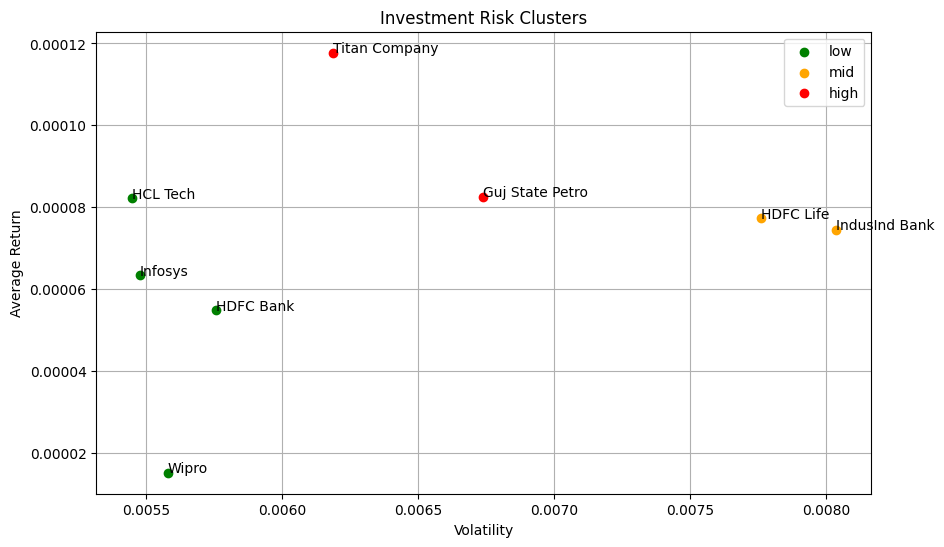

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define color map
color_map = {'low': 'green', 'mid': 'orange', 'high': 'red'}

# Plot each risk level with different color and add labels
for risk_level, color in color_map.items():
    subset = metrics_df[metrics_df['Risk_Level'] == risk_level]
    plt.scatter(subset['Volatility'], subset['Avg_Return'], color=color, label=risk_level)
    for i, row in subset.iterrows():
        plt.text(row['Volatility'], row['Avg_Return'], i)

# Add labels and title
plt.xlabel('Volatility')
plt.ylabel('Average Return')
plt.title('Investment Risk Clusters')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [14]:
def generate_recommendations(recommendations, metrics_df):
    clusters = {'low': [], 'mid': [], 'high': []}
    
    for stock in recommendations:
        stock_name = stock['name']
        
        # Check if the stock name is present in metrics_df
        if stock_name in metrics_df.index:
            target_price = stock['target_price']
            recommendation = stock['recommendation']
            risk_level = metrics_df.loc[stock_name, 'Risk_Level']
            
            clusters[risk_level].append({
                'Stock': stock_name,
                'Investment': stock['price'],
                'Target_Price': target_price,
                'Recommendation': recommendation
            })
    
    return clusters


clusters = generate_recommendations(all_recommended_stocks, metrics_df)
for risk_level, stocks in clusters.items():
    print(f"{risk_level.capitalize()} Risk Stocks:")
    for stock in stocks:
        print(f"Buy {stock['Stock']} at {stock['Investment']} and sell at {stock['Target_Price']} - {stock['Recommendation']}")
    print()


Low Risk Stocks:
Buy HCL Tech at 1324.10 and sell at 1880 - Buy HCL Technologies
Buy HCL Tech at 1324.10 and sell at 1880 - Buy HCL Technologies
Buy Infosys at 1406.90 and sell at 1870 - Buy Infosys
Buy Infosys at 1406.90 and sell at 1850 - Buy Infosys
Buy Infosys at 1406.90 and sell at 1850 - Buy Infosys
Buy Infosys at 1406.90 and sell at 1850 - Buy Infosys
Buy HDFC Bank at 1531.55 and sell at 2010 - Buy HDFC Bank
Buy HDFC Bank at 1531.55 and sell at 2000 - Buy HDFC Bank
Buy HDFC Bank at 1531.55 and sell at 2000 - Buy HDFC Bank
Buy HDFC Bank at 1531.55 and sell at 1950 - Buy HDFC Bank
Buy Infosys at 1406.90 and sell at 1750 - Buy Infosys
Buy Infosys at 1406.90 and sell at 1750 - Buy Infosys
Buy HDFC Bank at 1531.55 and sell at 1900 - Buy HDFC Bank
Buy Infosys at 1406.90 and sell at 1700 - Buy Infosys
Buy Wipro at 440.65 and sell at 520 - Neutral Wipro

Mid Risk Stocks:
Buy HDFC Life at 549.85 and sell at 750 - Buy HDFC Life Insurance Company
Buy HDFC Life at 549.85 and sell at 725 - B

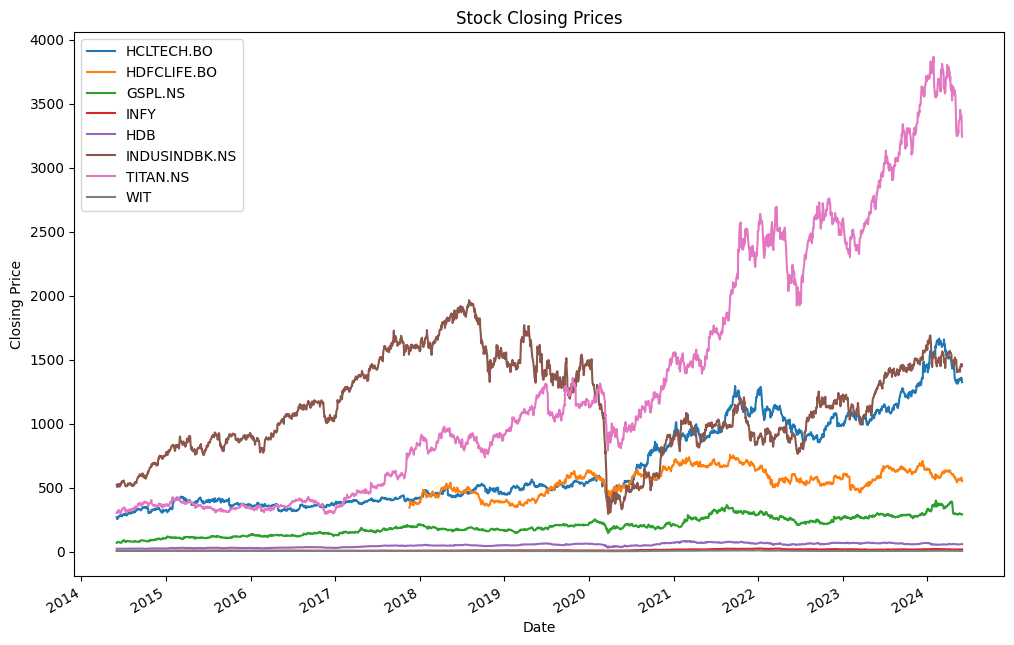

In [15]:
import matplotlib.pyplot as plt

def plot_stock_data(stock_data):
    plt.figure(figsize=(12, 8))
    for stock, data in stock_data.items():
        data['Close'].plot(label=stock)
    plt.title('Stock Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

plot_stock_data(stock_data)